In [77]:
import pandas as pd

df_train = pd.read_csv('../data/dataframe_train.csv')
df_test = pd.read_csv('../data/dataframe_test.csv')

In [78]:
df_train.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,...,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Date
0,A013010004908126703060931,78643044,0,20.00,1,0,0,0,551.0,0.000000,...,1,4.000000,4.0,4.0,20.00,0.00,27134,1,2,2017-02-01
1,A013011306908024927155000,78643045,0,20.00,1,0,0,0,551.0,0.000000,...,2,1.797685,4.0,4.0,28.61,8.61,27817,1,2,2017-02-01
2,A013010002908283134592527,78643046,0,57.64,1,0,0,0,549.0,0.000000,...,1,4.000000,4.0,4.0,57.64,0.00,28058,1,2,2017-02-01
3,A011010002908105209831316,78643047,0,54.29,0,1,1,1,267.0,0.000000,...,1,4.000000,4.0,4.0,54.29,0.00,28128,1,2,2017-02-01
4,A013010041908000125652029,78643048,0,26.90,1,0,0,0,549.0,0.003769,...,1,1.997106,4.0,4.0,59.15,32.25,29607,1,2,2017-02-01


In [79]:
df_train.shape

(3899362, 25)

In [80]:
from imblearn.under_sampling import NearMiss
import pandas as pd
import matplotlib.pyplot as plt

df_test = df_test.drop(['ZIBZIN','IDAvisAutorisationCheque','Date'], axis=1)

X_train = df_train.drop(['ZIBZIN','IDAvisAutorisationCheque','FlagImpaye','Date'], axis=1)
y_train = df_train['FlagImpaye']

nm = NearMiss(sampling_strategy=0.3) # 30 % pour la classe minoritaire
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)


columns = X_train.columns.tolist()
df_resampled = pd.DataFrame(X_resampled, columns=columns)
df_resampled['FlagImpaye'] = y_resampled

# Vérifier la distribution des classes
print(df_resampled['FlagImpaye'].value_counts())

print(df_resampled.shape)

FlagImpaye
0    78073
1    23422
Name: count, dtype: int64
(101495, 22)


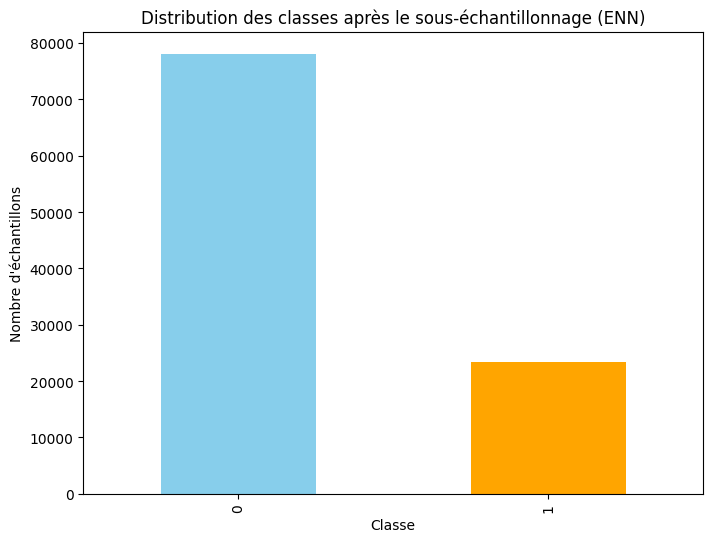

In [81]:
plt.figure(figsize=(8, 6))
df_resampled['FlagImpaye'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution des classes après le sous-échantillonnage (ENN)')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()

In [82]:
df_resampled.head()

,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,...,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,FlagImpaye
0,60.92,1,0,0,0,545.0,0.006986,11.305842,0.001252,50.500371,...,1,4.0,4.0,4.0,60.92,0.0,38669,4,5,0
1,76.14,0,1,1,1,1.0,3.807000,-1.492390,0.863439,20.270270,...,1,5.0,5.0,5.0,76.14,0.0,66509,17,5,0
2,50.99,1,0,0,0,547.0,0.000000,0.000000,0.000000,39.789501,...,1,4.0,4.0,4.0,50.99,0.0,35585,18,3,0
3,70.13,0,1,1,1,1.0,0.000000,0.000000,0.000000,33.596564,...,1,5.0,5.0,5.0,70.13,0.0,60571,8,4,0
4,70.13,0,1,1,1,1.0,0.000000,0.000000,0.000000,33.596564,...,1,5.0,5.0,5.0,70.13,0.0,60571,8,4,0


In [84]:
df_resampled.to_csv('../data/undersampling/dataframe_train.csv',index=False)
df_test.to_csv('../data/undersampling/dataframe_test.csv',index=False)